In [1]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from IPython.display import display
from sklearn.model_selection import cross_val_score
import category_encoders as ce



In [2]:
traindata=pandas.read_csv("Traindata.csv")
X = traindata.drop(['class'], axis=1)
y = traindata['class']
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.8, test_size=0.2, random_state=10)
X_test_original=X_test.copy(deep=False)
X_train_original=X_train.copy(deep=False)

In [3]:
encoder = ce.OrdinalEncoder(cols=['age', 'job', 'marital', 'education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

C:\Users\Krupal\anaconda3\envs\dtree\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):


In [4]:
clf = DecisionTreeClassifier(criterion="entropy",splitter="best",max_depth=3,random_state=0) #max_depth is maximum number of levels in the tree
clf.fit(X_train,y_train)
 

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [5]:
cls=['yes','no']
dot_data = tree.export_graphviz(clf, out_file=None, 
                              feature_names=X_train.columns, 
                              class_names=cls,
                              filled=True, rounded=True,  
                              special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('mydecisiontree.png')



True

In [6]:
prediction=clf.predict(X_test)

In [8]:
X_test_original['Will subscribe a term deposit(yes/no)']=prediction
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.width', 1000)
pandas.set_option('display.colheader_justify', 'center')
pandas.set_option('display.precision', 3)
X_test_original.to_csv("DecisionTreeOutput.csv",index=False)

In [9]:
accuracyScore=accuracy_score(y_test,prediction)
print(accuracyScore)
null_accuracy = (1206/(1206+151))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

0.8828729281767956
Null accuracy score: 0.8887


In [10]:
cm=confusion_matrix(y_test,prediction)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[784  12]
 [ 94  15]]

True Positives(TP) =  784

True Negatives(TN) =  15

False Positives(FP) =  12

False Negatives(FN) =  94


In [11]:

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

          no       0.89      0.98      0.94       796
         yes       0.56      0.14      0.22       109

    accuracy                           0.88       905
   macro avg       0.72      0.56      0.58       905
weighted avg       0.85      0.88      0.85       905



In [12]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8829


In [13]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1171


In [14]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9849


In [15]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8929


In [16]:
f1_score = 2 * (precision * recall) / (precision + recall)
print('F1 Score : {0:0.4f}'.format(f1_score))

F1 Score : 0.9367


In [17]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8929


In [18]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4444


In [19]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))


Specificity : 0.5556


In [20]:
scores = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
cross_validation_score=scores.mean()
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.90331492 0.89779006 0.91160221 0.88950276 0.89226519 0.89226519
 0.88088643 0.88642659 0.89196676 0.88642659]
Average cross-validation score: 0.8932


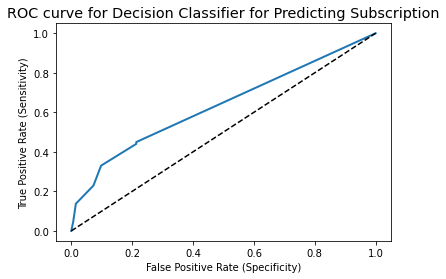

In [21]:
y_pred1 = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'yes')

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Decision Classifier for Predicting Subscription')
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [22]:
data = [accuracyScore,precision,recall,f1_score,true_positive_rate,false_positive_rate,cross_validation_score]
headers=["Accuracy Score", "Precision", "Recall", "F1 Score","True Positive Rate","False Positive Rate","Cross Validation Score"] 
print(pandas.DataFrame(data, headers))

                          0  
Accuracy Score          0.883
Precision               0.985
Recall                  0.893
F1 Score                0.937
True Positive Rate      0.893
False Positive Rate     0.444
Cross Validation Score  0.893
